# Initial Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler
import scipy
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve
!pip install scikit-optimize
import skopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Game Results

In [ ]:
#Read Excel File from Google Drive
#Game Results
url = "https://docs.google.com/spreadsheets/d/132xElOC4CW4RSHAW3jSUlIY1eMT28RO_WKSmNxHDYb0/edit?usp=share_link"
url_for_pandas = url.replace("/edit?usp=share_link", "/export?format=xlsx")
KC_Chiefs_Game_Results_df = pd.read_excel(url_for_pandas, header=1)

In [ ]:
KC_Chiefs_Game_Results_df.head()

,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
0,1,Sun,2023-09-11 00:00:00,4:25PM ET,boxscore,W,NaN,1-0,@,Arizona Cardinals,...,128.0,1.0,18.0,282.0,179.0,103.0,NaN,33.41,-2.29,-6.88
1,2,Thu,2023-09-15 00:00:00,8:15PM ET,boxscore,W,NaN,2-0,NaN,Los Angeles Chargers,...,93.0,NaN,21.0,401.0,326.0,75.0,1.0,5.54,-4.12,3.72
2,3,Sun,2023-09-25 00:00:00,1:00PM ET,boxscore,L,NaN,2023-02-01 00:00:00,@,Indianapolis Colts,...,58.0,2.0,19.0,259.0,177.0,82.0,1.0,1.78,7.10,-13.31
3,4,Sun,2023-10-02 00:00:00,8:20PM ET,boxscore,W,NaN,2023-03-01 00:00:00,@,Tampa Bay Buccaneers,...,189.0,1.0,27.0,376.0,373.0,3.0,2.0,17.12,-14.15,5.33
4,5,Mon,2023-10-10 00:00:00,8:15PM ET,boxscore,W,NaN,2023-04-01 00:00:00,NaN,Las Vegas Raiders,...,103.0,NaN,18.0,378.0,223.0,155.0,NaN,14.21,-11.65,0.35


In [ ]:
KC_Chiefs_Game_Results_df.shape

(22, 25)

In [ ]:
KC_Chiefs_Game_Results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Week        21 non-null     object 
 1   Day         20 non-null     object 
 2   Date        21 non-null     object 
 3   Unnamed: 3  20 non-null     object 
 4   Unnamed: 4  20 non-null     object 
 5   Unnamed: 5  20 non-null     object 
 6   OT          2 non-null      object 
 7   Rec         20 non-null     object 
 8   Unnamed: 8  10 non-null     object 
 9   Opp         21 non-null     object 
 10  Tm          20 non-null     float64
 11  Opp.1       20 non-null     float64
 12  1stD        20 non-null     float64
 13  TotYd       20 non-null     float64
 14  PassY       20 non-null     float64
 15  RushY       20 non-null     float64
 16  TO          14 non-null     float64
 17  1stD.1      20 non-null     float64
 18  TotYd.1     20 non-null     float64
 19  PassY.1     20 non-null     flo

* All the columns atleast have one missing value

## Cleanup/Exploration (Major Edit)
pd.nan added two more columns for some reason

In [ ]:
#Replace '--' with NANs
KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df.replace('--', np.nan)

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.shape

(22, 25)

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.head()

,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
0,1,Sun,2023-09-11 00:00:00,4:25PM ET,boxscore,W,NaN,1-0,@,Arizona Cardinals,...,128.0,1.0,18.0,282.0,179.0,103.0,NaN,33.41,-2.29,-6.88
1,2,Thu,2023-09-15 00:00:00,8:15PM ET,boxscore,W,NaN,2-0,NaN,Los Angeles Chargers,...,93.0,NaN,21.0,401.0,326.0,75.0,1.0,5.54,-4.12,3.72
2,3,Sun,2023-09-25 00:00:00,1:00PM ET,boxscore,L,NaN,2023-02-01 00:00:00,@,Indianapolis Colts,...,58.0,2.0,19.0,259.0,177.0,82.0,1.0,1.78,7.10,-13.31
3,4,Sun,2023-10-02 00:00:00,8:20PM ET,boxscore,W,NaN,2023-03-01 00:00:00,@,Tampa Bay Buccaneers,...,189.0,1.0,27.0,376.0,373.0,3.0,2.0,17.12,-14.15,5.33
4,5,Mon,2023-10-10 00:00:00,8:15PM ET,boxscore,W,NaN,2023-04-01 00:00:00,NaN,Las Vegas Raiders,...,103.0,NaN,18.0,378.0,223.0,155.0,NaN,14.21,-11.65,0.35


In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.shape

(22, 25)

In [ ]:
#Drop Rows 7 and 18 as they are filler rows
KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.drop([7, 18], axis=0)

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.reset_index()

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.head(20)

,index,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
0,0,1,Sun,2023-09-11 00:00:00,4:25PM ET,boxscore,W,NaN,1-0,@,...,128.0,1.0,18.0,282.0,179.0,103.0,NaN,33.41,-2.29,-6.88
1,1,2,Thu,2023-09-15 00:00:00,8:15PM ET,boxscore,W,NaN,2-0,NaN,...,93.0,NaN,21.0,401.0,326.0,75.0,1.0,5.54,-4.12,3.72
2,2,3,Sun,2023-09-25 00:00:00,1:00PM ET,boxscore,L,NaN,2023-02-01 00:00:00,@,...,58.0,2.0,19.0,259.0,177.0,82.0,1.0,1.78,7.10,-13.31
3,3,4,Sun,2023-10-02 00:00:00,8:20PM ET,boxscore,W,NaN,2023-03-01 00:00:00,@,...,189.0,1.0,27.0,376.0,373.0,3.0,2.0,17.12,-14.15,5.33
4,4,5,Mon,2023-10-10 00:00:00,8:15PM ET,boxscore,W,NaN,2023-04-01 00:00:00,NaN,...,103.0,NaN,18.0,378.0,223.0,155.0,NaN,14.21,-11.65,0.35
5,5,6,Sun,2023-10-16 00:00:00,4:25PM ET,boxscore,L,NaN,2023-04-02 00:00:00,NaN,...,68.0,2.0,26.0,443.0,318.0,125.0,1.0,6.45,-11.13,-0.56
6,6,7,Sun,2023-10-23 00:00:00,4:25PM ET,boxscore,W,NaN,2023-05-02 00:00:00,@,...,112.0,2.0,25.0,444.0,343.0,101.0,3.0,30.58,-3.59,-8.50
7,8,9,Sun,2023-11-06 00:00:00,8:20PM ET,boxscore,W,OT,2023-06-02 00:00:00,NaN,...,77.0,1.0,9.0,229.0,57.0,172.0,NaN,5.59,3.85,-5.59
8,9,10,Sun,2023-11-13 00:00:00,1:00PM ET,boxscore,W,NaN,2023-07-02 00:00:00,NaN,...,155.0,3.0,17.0,315.0,240.0,75.0,NaN,23.27,-3.86,-7.32
9,10,11,Sun,2023-11-20 00:00:00,8:20PM ET,boxscore,W,NaN,2023-08-02 00:00:00,@,...,163.0,1.0,22.0,365.0,250.0,115.0,2.0,19.64,-8.61,-2.61


In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.shape

(20, 26)

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.columns

Index(['index', 'Week', 'Day', 'Date', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'OT', 'Rec', 'Unnamed: 8', 'Opp', 'Tm', 'Opp.1', '1stD',
       'TotYd', 'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1',
       'RushY.1', 'TO.1', 'Offense', 'Defense', 'Sp. Tms'],
      dtype='object')

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.drop('index', axis=1)

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned

,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
0,1,Sun,2023-09-11 00:00:00,4:25PM ET,boxscore,W,NaN,1-0,@,Arizona Cardinals,...,128.0,1.0,18.0,282.0,179.0,103.0,NaN,33.41,-2.29,-6.88
1,2,Thu,2023-09-15 00:00:00,8:15PM ET,boxscore,W,NaN,2-0,NaN,Los Angeles Chargers,...,93.0,NaN,21.0,401.0,326.0,75.0,1.0,5.54,-4.12,3.72
2,3,Sun,2023-09-25 00:00:00,1:00PM ET,boxscore,L,NaN,2023-02-01 00:00:00,@,Indianapolis Colts,...,58.0,2.0,19.0,259.0,177.0,82.0,1.0,1.78,7.10,-13.31
3,4,Sun,2023-10-02 00:00:00,8:20PM ET,boxscore,W,NaN,2023-03-01 00:00:00,@,Tampa Bay Buccaneers,...,189.0,1.0,27.0,376.0,373.0,3.0,2.0,17.12,-14.15,5.33
4,5,Mon,2023-10-10 00:00:00,8:15PM ET,boxscore,W,NaN,2023-04-01 00:00:00,NaN,Las Vegas Raiders,...,103.0,NaN,18.0,378.0,223.0,155.0,NaN,14.21,-11.65,0.35
5,6,Sun,2023-10-16 00:00:00,4:25PM ET,boxscore,L,NaN,2023-04-02 00:00:00,NaN,Buffalo Bills,...,68.0,2.0,26.0,443.0,318.0,125.0,1.0,6.45,-11.13,-0.56
6,7,Sun,2023-10-23 00:00:00,4:25PM ET,boxscore,W,NaN,2023-05-02 00:00:00,@,San Francisco 49ers,...,112.0,2.0,25.0,444.0,343.0,101.0,3.0,30.58,-3.59,-8.50
7,9,Sun,2023-11-06 00:00:00,8:20PM ET,boxscore,W,OT,2023-06-02 00:00:00,NaN,Tennessee Titans,...,77.0,1.0,9.0,229.0,57.0,172.0,NaN,5.59,3.85,-5.59
8,10,Sun,2023-11-13 00:00:00,1:00PM ET,boxscore,W,NaN,2023-07-02 00:00:00,NaN,Jacksonville Jaguars,...,155.0,3.0,17.0,315.0,240.0,75.0,NaN,23.27,-3.86,-7.32
9,11,Sun,2023-11-20 00:00:00,8:20PM ET,boxscore,W,NaN,2023-08-02 00:00:00,@,Los Angeles Chargers,...,163.0,1.0,22.0,365.0,250.0,115.0,2.0,19.64,-8.61,-2.61


### Adjustments of Columns

#### Remove columns that are not needed

In [ ]:
#Remove columns that are not needed

KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.drop(['Week', 'Day', 'Date',	'Unnamed: 3',	'Unnamed: 4', 'OT',	'Rec',	'Unnamed: 8'], axis = 1)

In [ ]:
# Rename the unnamed column Unnamed: 5 to 'Win/Loss'
KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.rename(columns={'Unnamed: 5': 'Win/Loss'})

In [ ]:
#Encode W/L column to Binary Format
# Convert 'W' to 1 and 'L' to 0
KC_Chiefs_Game_Results_df_Cleaned['Win/Loss'] = KC_Chiefs_Game_Results_df_Cleaned['Win/Loss'].map({'W': 1, 'L': 0})

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.loc[:, ['Win/Loss']]

,Win/Loss
0,1
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [ ]:
# Rename the score columns for the Team & Opponents
KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.rename(columns={'Tm': 'Team_Score', 'Opp.1': 'Opponent_Score' })

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.loc[:, ['Team_Score', 'Opponent_Score']]

,Team_Score,Opponent_Score
0,44.0,21.0
1,27.0,24.0
2,17.0,20.0
3,41.0,31.0
4,30.0,29.0
5,20.0,24.0
6,44.0,23.0
7,20.0,17.0
8,27.0,17.0
9,30.0,27.0


In [ ]:
# Calculate the difference between columns Team and Opponent Scores and assign it to a new column 'Score_Diff'
KC_Chiefs_Game_Results_df_Cleaned['Score_Diff'] = KC_Chiefs_Game_Results_df_Cleaned['Team_Score'] - KC_Chiefs_Game_Results_df_Cleaned['Opponent_Score']

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned

,Win/Loss,Opp,Team_Score,Opponent_Score,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Score_Diff
0,1,Arizona Cardinals,44.0,21.0,33.0,488.0,360.0,128.0,1.0,18.0,282.0,179.0,103.0,NaN,33.41,-2.29,-6.88,23.0
1,1,Los Angeles Chargers,27.0,24.0,15.0,319.0,226.0,93.0,NaN,21.0,401.0,326.0,75.0,1.0,5.54,-4.12,3.72,3.0
2,0,Indianapolis Colts,17.0,20.0,20.0,315.0,257.0,58.0,2.0,19.0,259.0,177.0,82.0,1.0,1.78,7.10,-13.31,-3.0
3,1,Tampa Bay Buccaneers,41.0,31.0,27.0,417.0,228.0,189.0,1.0,27.0,376.0,373.0,3.0,2.0,17.12,-14.15,5.33,10.0
4,1,Las Vegas Raiders,30.0,29.0,29.0,368.0,265.0,103.0,NaN,18.0,378.0,223.0,155.0,NaN,14.21,-11.65,0.35,1.0
5,0,Buffalo Bills,20.0,24.0,23.0,387.0,319.0,68.0,2.0,26.0,443.0,318.0,125.0,1.0,6.45,-11.13,-0.56,-4.0
6,1,San Francisco 49ers,44.0,23.0,24.0,529.0,417.0,112.0,2.0,25.0,444.0,343.0,101.0,3.0,30.58,-3.59,-8.50,21.0
7,1,Tennessee Titans,20.0,17.0,29.0,499.0,422.0,77.0,1.0,9.0,229.0,57.0,172.0,NaN,5.59,3.85,-5.59,3.0
8,1,Jacksonville Jaguars,27.0,17.0,26.0,486.0,331.0,155.0,3.0,17.0,315.0,240.0,75.0,NaN,23.27,-3.86,-7.32,10.0
9,1,Los Angeles Chargers,30.0,27.0,23.0,485.0,322.0,163.0,1.0,22.0,365.0,250.0,115.0,2.0,19.64,-8.61,-2.61,3.0


Origninally was going to use opponents as a feature but since this is only for one year this change will not be necessary

In [ ]:
# #Give Numerical label for Each Opponent
# from sklearn.preprocessing import LabelEncoder

# # Instantiate the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the 'Opponent' column
# KC_Chiefs_Game_Results_df_Cleaned['Opp_encoded'] = label_encoder.fit_transform(KC_Chiefs_Game_Results_df_Cleaned['Opp'])

In [ ]:
#KC_Chiefs_Game_Results_df_Cleaned.loc[:, ['Opp_encoded', 'Opp']]

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned

,Win/Loss,Opp,Team_Score,Opponent_Score,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Score_Diff
0,1,Arizona Cardinals,44.0,21.0,33.0,488.0,360.0,128.0,1.0,18.0,282.0,179.0,103.0,NaN,33.41,-2.29,-6.88,23.0
1,1,Los Angeles Chargers,27.0,24.0,15.0,319.0,226.0,93.0,NaN,21.0,401.0,326.0,75.0,1.0,5.54,-4.12,3.72,3.0
2,0,Indianapolis Colts,17.0,20.0,20.0,315.0,257.0,58.0,2.0,19.0,259.0,177.0,82.0,1.0,1.78,7.10,-13.31,-3.0
3,1,Tampa Bay Buccaneers,41.0,31.0,27.0,417.0,228.0,189.0,1.0,27.0,376.0,373.0,3.0,2.0,17.12,-14.15,5.33,10.0
4,1,Las Vegas Raiders,30.0,29.0,29.0,368.0,265.0,103.0,NaN,18.0,378.0,223.0,155.0,NaN,14.21,-11.65,0.35,1.0
5,0,Buffalo Bills,20.0,24.0,23.0,387.0,319.0,68.0,2.0,26.0,443.0,318.0,125.0,1.0,6.45,-11.13,-0.56,-4.0
6,1,San Francisco 49ers,44.0,23.0,24.0,529.0,417.0,112.0,2.0,25.0,444.0,343.0,101.0,3.0,30.58,-3.59,-8.50,21.0
7,1,Tennessee Titans,20.0,17.0,29.0,499.0,422.0,77.0,1.0,9.0,229.0,57.0,172.0,NaN,5.59,3.85,-5.59,3.0
8,1,Jacksonville Jaguars,27.0,17.0,26.0,486.0,331.0,155.0,3.0,17.0,315.0,240.0,75.0,NaN,23.27,-3.86,-7.32,10.0
9,1,Los Angeles Chargers,30.0,27.0,23.0,485.0,322.0,163.0,1.0,22.0,365.0,250.0,115.0,2.0,19.64,-8.61,-2.61,3.0


In [ ]:
#Rename "Offense" and "Defense" to "Expected_Points_Offense" and Expected_Points_Defense

KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.rename(columns={'Offense': 'Expected_Points_Offense', 'Defense': 'Expected_Points_Defense' })

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.loc[:, ['Expected_Points_Offense', 'Expected_Points_Defense']]

,Expected_Points_Offense,Expected_Points_Defense
0,33.41,-2.29
1,5.54,-4.12
2,1.78,7.10
3,17.12,-14.15
4,14.21,-11.65
5,6.45,-11.13
6,30.58,-3.59
7,5.59,3.85
8,23.27,-3.86
9,19.64,-8.61


### Ensure correct Data Types are assigned to Numerical Values

In [ ]:
# Convert NaN values to zero
#KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df.fillna(0).astype(int)

#Ensure object data types are converted to integer

KC_Chiefs_Game_Results_df_Cleaned['Opponent_Score'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['Opponent_Score'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['1stD'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['1stD'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['TotYd'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['TotYd'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['PassY'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['PassY'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['RushY'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['RushY'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['TO'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['TO'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['1stD.1'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['1stD.1'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['TotYd.1'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['TotYd.1'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['PassY.1'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['PassY.1'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['RushY.1'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['RushY.1'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['TO.1'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['TO.1'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['Expected_Points_Offense'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['Expected_Points_Offense'], errors='coerce').fillna(0).astype(int)
KC_Chiefs_Game_Results_df_Cleaned['Expected_Points_Defense'] = pd.to_numeric(KC_Chiefs_Game_Results_df_Cleaned['Expected_Points_Defense'], errors='coerce').fillna(0).astype(int)

In [ ]:
#Ensure object data types are converted to integer

KC_Chiefs_Game_Results_df_Cleaned['Opponent_Score'] = KC_Chiefs_Game_Results_df_Cleaned['Opponent_Score'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['1stD'] = KC_Chiefs_Game_Results_df_Cleaned['1stD'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['TotYd'] = KC_Chiefs_Game_Results_df_Cleaned['TotYd'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['PassY'] = KC_Chiefs_Game_Results_df_Cleaned['PassY'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['RushY'] = KC_Chiefs_Game_Results_df_Cleaned['RushY'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['TO'] = KC_Chiefs_Game_Results_df_Cleaned['TO'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['1stD.1'] = KC_Chiefs_Game_Results_df_Cleaned['1stD.1'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['TotYd.1'] = KC_Chiefs_Game_Results_df_Cleaned['TotYd.1'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['PassY.1'] = KC_Chiefs_Game_Results_df_Cleaned['PassY.1'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['RushY.1'] = KC_Chiefs_Game_Results_df_Cleaned['RushY.1'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['TO.1'] = KC_Chiefs_Game_Results_df_Cleaned['TO.1'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['Expected_Points_Offense'] = KC_Chiefs_Game_Results_df_Cleaned['Expected_Points_Offense'].astype(int)
KC_Chiefs_Game_Results_df_Cleaned['Expected_Points_Defense'] = KC_Chiefs_Game_Results_df_Cleaned['Expected_Points_Defense'].astype(int)


In [ ]:
KC_Chiefs_Game_Results_df_Cleaned

,Win/Loss,Opp,Team_Score,Opponent_Score,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Expected_Points_Offense,Expected_Points_Defense,Sp. Tms,Score_Diff
0,1,Arizona Cardinals,44.0,21,33,488,360,128,1,18,282,179,103,0,33,-2,-6.88,23.0
1,1,Los Angeles Chargers,27.0,24,15,319,226,93,0,21,401,326,75,1,5,-4,3.72,3.0
2,0,Indianapolis Colts,17.0,20,20,315,257,58,2,19,259,177,82,1,1,7,-13.31,-3.0
3,1,Tampa Bay Buccaneers,41.0,31,27,417,228,189,1,27,376,373,3,2,17,-14,5.33,10.0
4,1,Las Vegas Raiders,30.0,29,29,368,265,103,0,18,378,223,155,0,14,-11,0.35,1.0
5,0,Buffalo Bills,20.0,24,23,387,319,68,2,26,443,318,125,1,6,-11,-0.56,-4.0
6,1,San Francisco 49ers,44.0,23,24,529,417,112,2,25,444,343,101,3,30,-3,-8.50,21.0
7,1,Tennessee Titans,20.0,17,29,499,422,77,1,9,229,57,172,0,5,3,-5.59,3.0
8,1,Jacksonville Jaguars,27.0,17,26,486,331,155,3,17,315,240,75,0,23,-3,-7.32,10.0
9,1,Los Angeles Chargers,30.0,27,23,485,322,163,1,22,365,250,115,2,19,-8,-2.61,3.0


### Correlation

In [ ]:
KC_Chiefs_Game_Results_df_Cleaned.corr()

<ipython-input-112-0f4313caf03a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  KC_Chiefs_Game_Results_df_Cleaned.corr()


,Win/Loss,Team_Score,Opponent_Score,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Expected_Points_Offense,Expected_Points_Defense,Sp. Tms,Score_Diff
Win/Loss,1.000000,0.497030,-0.095457,0.230185,0.322458,0.159377,0.257645,-0.200082,-0.351526,-0.259922,-0.170358,-0.139220,0.276139,0.297431,0.234804,0.180881,0.566093
Team_Score,0.497030,1.000000,0.403352,0.299121,0.414673,0.084159,0.518258,-0.053115,0.344123,0.254873,0.382808,-0.346967,0.270666,0.789931,-0.285708,0.203863,0.637781
Opponent_Score,-0.095457,0.403352,1.000000,0.037045,0.016430,-0.131939,0.229871,-0.037950,0.562195,0.584682,0.593576,-0.158225,-0.026188,0.191859,-0.821262,0.456717,-0.447533
1stD,0.230185,0.299121,0.037045,1.000000,0.712140,0.497371,0.344008,0.254204,-0.350145,-0.437511,-0.390012,-0.002954,-0.221727,0.475686,-0.081036,-0.292757,0.261147
TotYd,0.322458,0.414673,0.016430,0.712140,1.000000,0.793453,0.335992,0.523669,-0.266406,-0.232148,-0.191698,-0.035731,0.045669,0.574788,0.001346,-0.344657,0.391428
PassY,0.159377,0.084159,-0.131939,0.497371,0.793453,1.000000,-0.306654,0.622516,-0.446364,-0.260355,-0.290173,0.128401,0.044137,0.214083,0.239326,-0.516981,0.193305
RushY,0.257645,0.518258,0.229871,0.344008,0.335992,-0.306654,1.000000,-0.144401,0.274129,0.039853,0.149255,-0.254580,0.003119,0.567599,-0.368255,0.261035,0.313001
TO,-0.200082,-0.053115,-0.037950,0.254204,0.523669,0.622516,-0.144401,1.000000,-0.163047,-0.244220,-0.121342,-0.217584,0.115011,0.054043,0.177527,-0.531248,-0.019965
1stD.1,-0.351526,0.344123,0.562195,-0.350145,-0.266406,-0.446364,0.274129,-0.163047,1.000000,0.803908,0.862862,-0.322256,0.270031,0.259542,-0.646849,0.420638,-0.136905
TotYd.1,-0.259922,0.254873,0.584682,-0.437511,-0.232148,-0.260355,0.039853,-0.244220,0.803908,1.000000,0.894903,-0.001027,0.071714,0.200144,-0.718385,0.541054,-0.243056


<ipython-input-113-ee05080619b0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat_KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.corr()


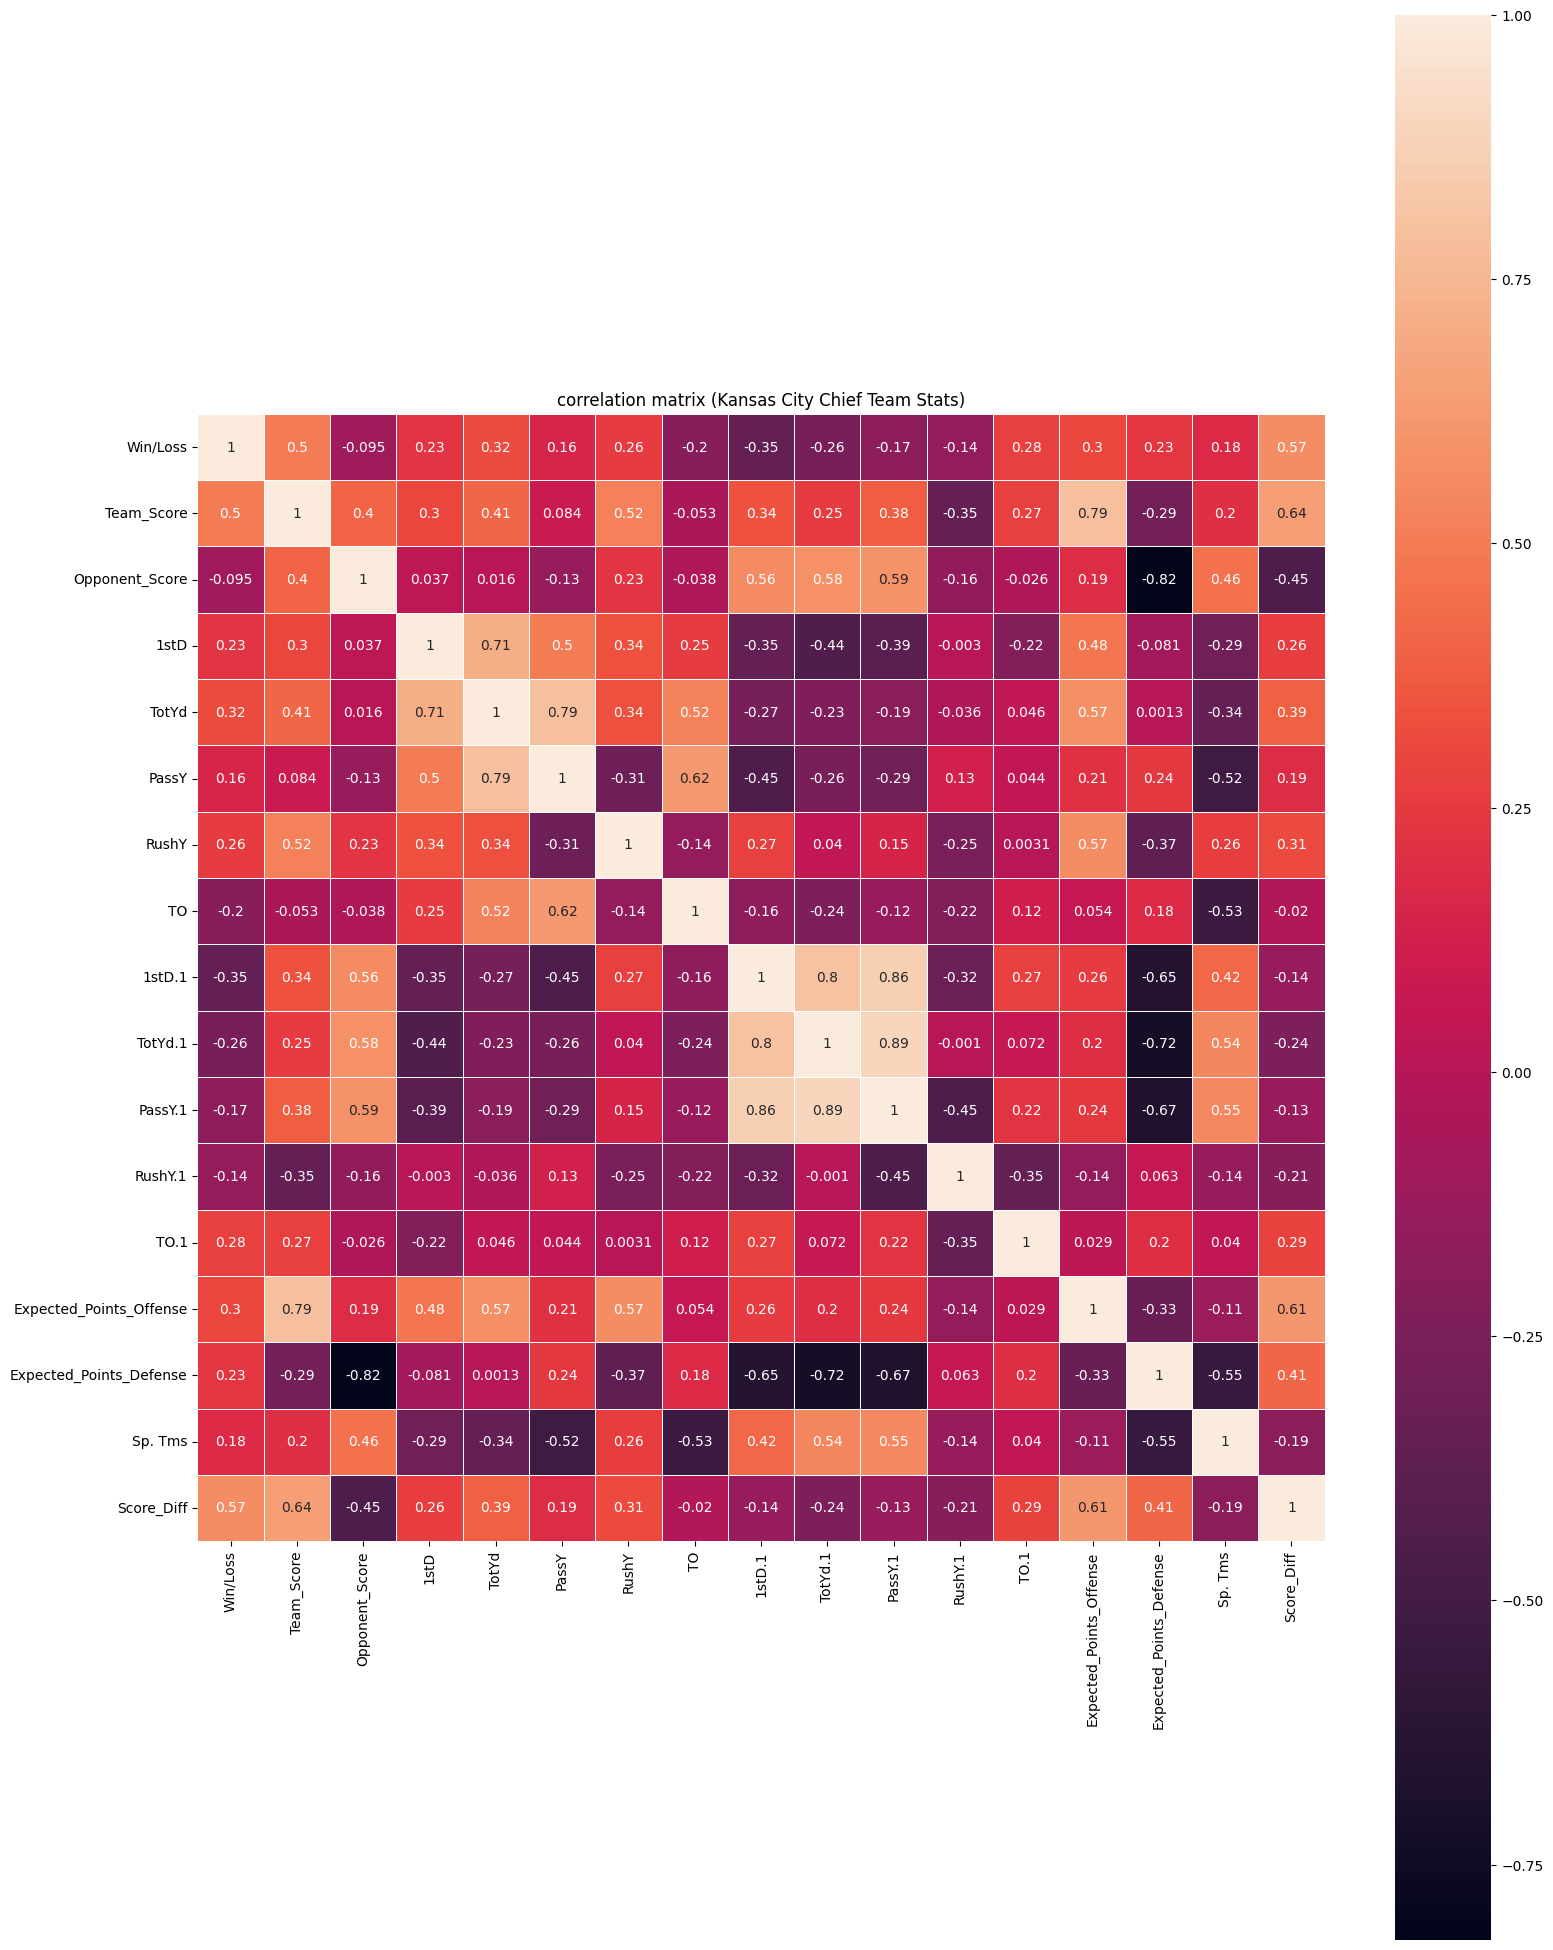

In [ ]:
# Make the correlation matrices

corrmat_KC_Chiefs_Game_Results_df_Cleaned = KC_Chiefs_Game_Results_df_Cleaned.corr()

# Use Heat maps

plt.figure(figsize=(40,25))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_KC_Chiefs_Game_Results_df_Cleaned, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Kansas City Chief Team Stats)")

plt.show()

## Default Random Forest Model
( Model without pca)

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [ ]:
X = KC_Chiefs_Game_Results_df_Cleaned.drop("Win/Loss", axis=1)
Y = KC_Chiefs_Game_Results_df_Cleaned['Win/Loss']

In [ ]:
X = X.drop('Opp',axis=1)

The "Opp" or Opponents Column is not needed to build the model

In [ ]:
scaler = StandardScaler()

X_standard = scaler.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.5, random_state = 42, stratify=Y)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predict_train = rf.predict(x_train)
predict_test = rf.predict(x_test)

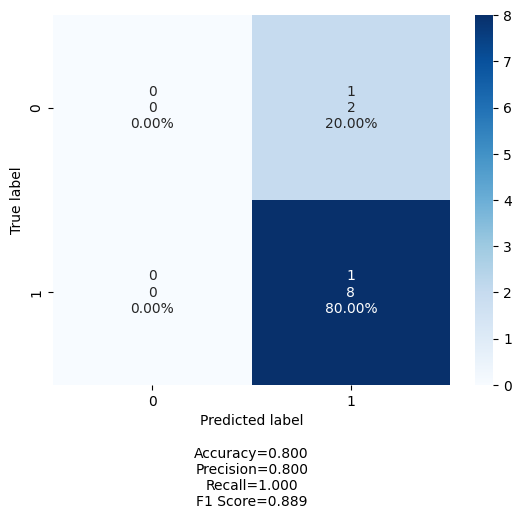

In [ ]:
#cm = (y_test, predict_test)
cm=confusion_matrix(y_test, predict_test)
labels = ['0','1','0','1']
make_confusion_matrix(cm,
                      group_names=labels,
                      cmap='Blues')
#plot_confusion_matrix(cm,[0,1],False)

In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      1.00      0.89         8

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

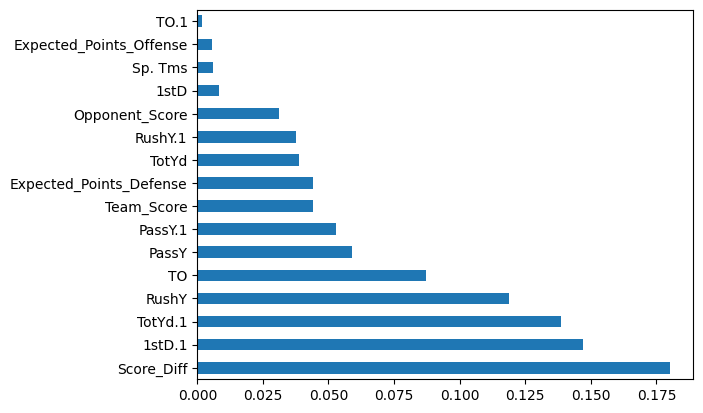

In [ ]:
import matplotlib.pyplot as plt

rf.fit(x_train, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Default Random Forest Model With Resampling
Resampling the Minority (Losses)
using RandomOverSampler

In [ ]:
# smote = SMOTE(sampling_strategy = 'not majority', k_neighbors=3)
# xsm, ysm = smote.fit_resample(x_train, y_train)
ros = RandomOverSampler(random_state = 42)
x_ros,y_ros = ros.fit_resample(x_train, y_train)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_ros, y_ros)

RandomForestClassifier(random_state=42)

In [ ]:
predict_train = rf.predict(x_ros)
predict_test = rf.predict(x_test)

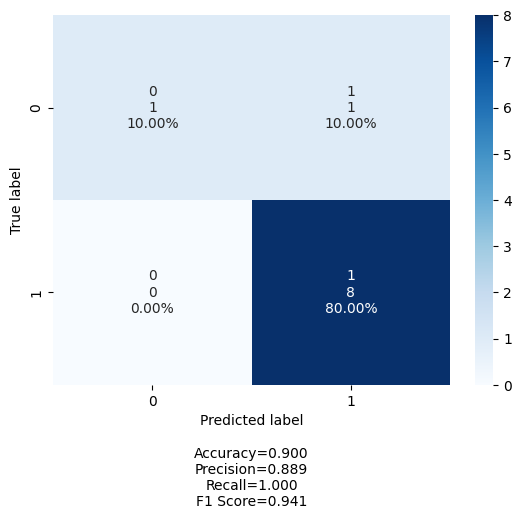

In [ ]:
#cm = (y_test, predict_test)
cm=confusion_matrix(y_test, predict_test)
labels = ['0','1','0','1']
make_confusion_matrix(cm,
                      group_names=labels,
                      cmap='Blues')
#plot_confusion_matrix(cm,[0,1],False)

In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.89      1.00      0.94         8

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10



<Axes: >

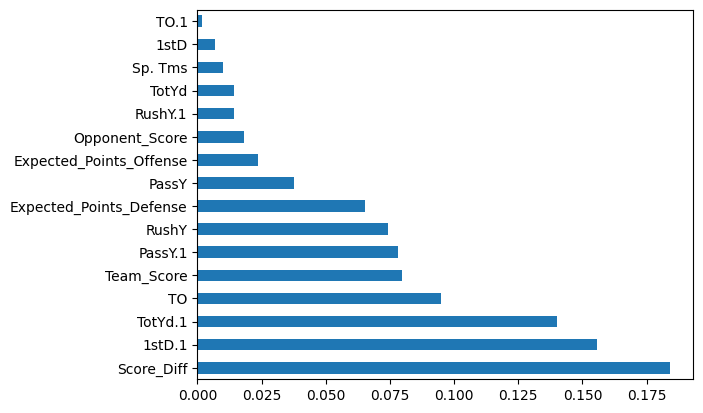

In [ ]:
import matplotlib.pyplot as plt

rf.fit(x_ros, y_ros)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Hyperparameter Tuning

### Bayesian Optimization Technique

In [ ]:
from skopt import BayesSearchCV


# Define the parameter search space
param_space = {
    'n_estimators': (10, 200),  # Number of trees
    'max_depth': (1, 20),  # Maximum depth of each tree
    'min_samples_split': (2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': (1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': (0.1, 1.0),  # Proportion of features to consider when looking for the best split
}

In [ ]:
# Define the objective function to be optimized (model evaluation metric)
def objective_function(params):
    model = RandomForestClassifier(**params)
    score = np.mean(cross_val_score(model, x_ros, y_ros, cv=5))
    return -score  # Negative since Bayesian Optimization aims to maximize

In [ ]:
# Perform Bayesian Optimization
opt = BayesSearchCV(
    RandomForestClassifier(random_state=42),
    param_space,
    n_iter=50,  # Number of iterations or evaluations
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)
opt.fit(x_ros, y_ros)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_jobs=-1, random_state=42,
              search_spaces={'max_depth': (1, 20), 'max_features': (0.1, 1.0),
                             'min_samples_leaf': (1, 10),
                             'min_samples_split': (2, 20),
                             'n_estimators': (10, 200)})

In [ ]:
# Print the best hyperparameters found
print("Best parameters found:", opt.best_params_)
print("Best cross-validation score:", opt.best_score_)

Best parameters found: OrderedDict([('max_depth', 9), ('max_features', 0.9268502695024393), ('min_samples_leaf', 2), ('min_samples_split', 10), ('n_estimators', 46)])
Best cross-validation score: 1.0


In [ ]:
rf_bayes = RandomForestClassifier(
    n_estimators= 46,
    max_depth= 9,
    min_samples_split= 10,
    min_samples_leaf= 2,
    max_features=0.927
)

In [ ]:
rf_bayes.fit(x_ros, y_ros)
predict_train = rf_bayes.predict(x_ros)
predict_test = rf_bayes.predict(x_test)

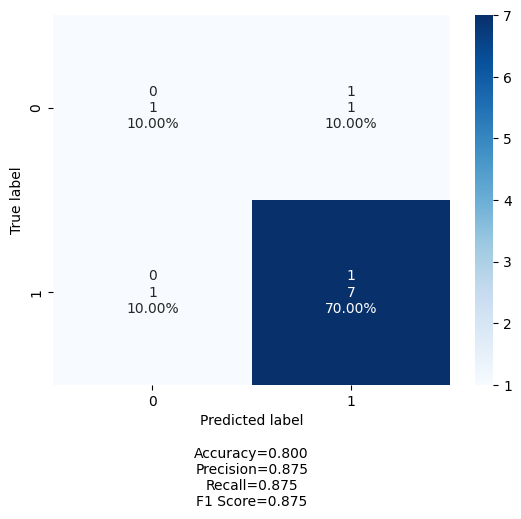

In [ ]:
#cm = (y_test, predict_test)
cm=confusion_matrix(y_test, predict_test)
labels = ['0','1','0','1']
make_confusion_matrix(cm,
                      group_names=labels,
                      cmap='Blues')
#plot_confusion_matrix(cm,[0,1],False)

In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.88      0.88      0.88         8

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



### Random Search Technique

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
param_space = {
    'n_estimators': (10, 200),  # Number of trees
    'max_depth': (1, 20),  # Maximum depth of each tree
    'min_samples_split': (2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': (1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': (0.1, 1.0),  # Proportion of features to consider when looking for the best split
}

In [ ]:
# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_space,
    n_iter=50,  # Number of iterations or parameter settings to sample
    cv=5,  # Number of cross-validation folds
    random_state=42
)
random_search.fit(x_ros, y_ros)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': (1, 20),
                                        'max_features': (0.1, 1.0),
                                        'min_samples_leaf': (1, 10),
                                        'min_samples_split': (2, 20),
                                        'n_estimators': (10, 200)})

In [ ]:
# Print the best hyperparameters found
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Best parameters found: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.1, 'max_depth': 1}
Best cross-validation score: 1.0


In [ ]:
rf_random_search = RandomForestClassifier(
    n_estimators = 10,
    max_depth = 1,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 0.1
)
rf_random_search.fit(x_ros,y_ros)

RandomForestClassifier(max_depth=1, max_features=0.1, n_estimators=10)

In [ ]:
predict_train = rf_random_search.predict(x_ros)
predict_test = rf_random_search.predict(x_test)

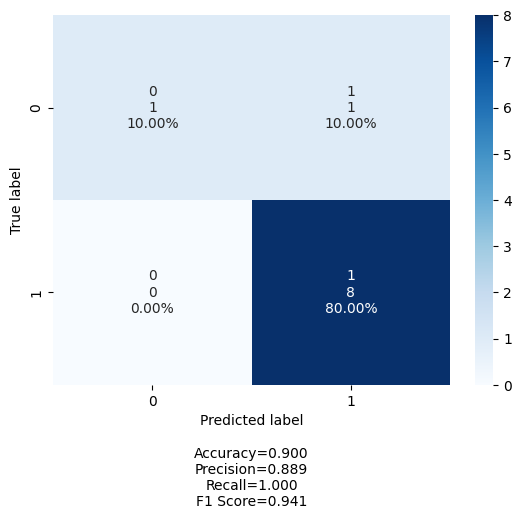

In [ ]:
#cm = (y_test, predict_test)
cm=confusion_matrix(y_test, predict_test)
labels = ['0','1','0','1']
make_confusion_matrix(cm,
                      group_names=labels,
                      cmap='Blues')
#plot_confusion_matrix(cm,[0,1],False)

In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.89      1.00      0.94         8

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10



In [ ]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test accuracy of the best model:", test_accuracy)

Test accuracy of the best model: 0.8
